# APS - otimização por vetor gradiente

Bruno Zalcberg, Humberto Filho e Rafael Paves

Maio/2023

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### **1a etapa:** 

$$
f(x, y) = x^2 + xy + 4y^2 - x + 3y
$$

##### a) Construa o gráfico de 𝑓 no GeoGebra e observe que 𝑓 possui um único ponto de mínimo e não possui pontos de máximo

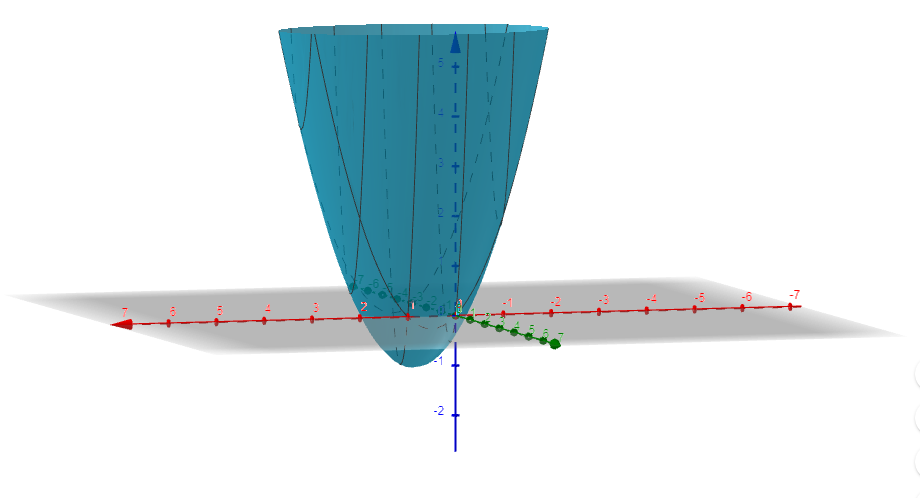

##### b) Determine o vetor gradiente de 𝑓 em um ponto genérico (𝑥, 𝑦)

As derivadas parciais dessa função são dadas por: 

$$\frac{\partial f}{\partial x} = 2x + y - 1$$
$$\frac{\partial f}{\partial y} = x + 8y + 3$$

Dessa forma, o vetor gradiente em um ponto genérico $(x, y)$ é:

$$\nabla f = \begin{bmatrix} 2x + y - 1 \\ x + 8y + 3 \end{bmatrix}$$

##### c) Usando as ideias desenvolvidas na página anterior, elabore um código que permita determinar o ponto de mínimo da função 𝑓. Utilize um passo fixo 𝛼 = 0,1 e a estimativa inicial (𝑥0, 𝑦0) = (0, 0). A precisão do cálculo deverá ser de $10^{-5}$

In [2]:
import numpy as np

def gradiente(x, y):
    dfdx = 2*x + y - 1
    dfdy = x + 8*y + 3
    return np.array([dfdx, dfdy])

a = 0.1
precisao = 1e-5
p = np.array([0, 0])

steps = 1
while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
    p = p - a * gradiente(p[0], p[1])
    steps += 1
print(f"O mínimo da função ocorre em: x = {p[0]:.5f} e y = {p[1]:.5f}, sendo alfa = {a}. O número de iterações foi {steps}.")


O mínimo da função ocorre em: x = 0.73333 e y = -0.46667, sendo alfa = 0.1. O número de iterações foi 60.


##### d) Repita o procedimento para os seguintes valores do passo: 𝛼 = 0,15, 𝛼 = 0,2, 𝛼 = 0,3 e 𝛼 = 0,5.

In [3]:
from numpy import inf

def gradiente(x, y):
    dfdx = 2*x + y - 1
    dfdy = x + 8*y + 3
    return np.array([dfdx, dfdy])

def algoritmo(p_inicial, alfa, precisao, max_iter=10000):
    iter = 0
    p = p_inicial
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        p = p - alfa * gradiente(p[0], p[1])
        iter += 1
        if iter > max_iter:
            break
    return p, iter

# pontos iniciais
p_iniciais = [np.array([0, 0])]

# valores de alfa
alfas = [0.15, 0.2, 0.3, 0.5]

# precisão
precisao = 1e-5

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_min, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        elif x_min[0] == inf or x_min[0] == -inf:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o algoritmo divergiu.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o mínimo da função ocorre em: x = {x_min[0]:.5f}, y = {x_min[1]:.5f}, sendo o número de iterações {steps}.')

Para o ponto inicial [0 0] e alfa = 0.15, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 37.
Para o ponto inicial [0 0] e alfa = 0.2, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 28.
Para o ponto inicial [0 0] e alfa = 0.3, o algoritmo divergiu.
Para o ponto inicial [0 0] e alfa = 0.5, o algoritmo divergiu.


Para alfas maiores, o algoritmo diverge. Dados uma função e seu gradiente, se o alfa escolhido for muito grande, pode-se acabar dando passos muito grandes, o que pode levar a uma série de problemas. Um desses problemas é a divergência, que é quando o algoritmo falha em convergir para um mínimo e, em vez disso, os valores continuam a crescer (ou diminuir) indefinidamente. Isso pode acontecer se um passo grande demais fizer com que se ultrapasse o mínimo e acabe do outro lado da curva. Na próxima iteração, pode-se então dar outro passo grande que o leva ainda mais longe do mínimo, e assim por diante.

#### **2a etapa:** 

$$
\sqrt{x^2 + y^2 + 2} + x^2 e^{-y^2} + (x - 3)^2
$$


In [4]:
import numpy as np

def g(x, y):
    return np.sqrt(x**2 + y**2 + 2) + x**2 * np.exp(-y**2) + (x - 3)**2

def gradiente(x, y):
    dgdx = x * ((1 / np.sqrt(x**2 + y**2 + 2)) + 2*np.exp(-y**2) + 2) - 6
    dgdy = y * ((1 / np.sqrt(x**2 + y**2 + 2)) - 2*x**2 * np.exp(-y**2))
    return np.array([dgdx, dgdy])

def algoritmo(p_inicial, alfa, precisao, max_iter=10000):
    iter = 0
    p = p_inicial
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        p = p - alfa * gradiente(p[0], p[1])
        iter += 1
        if iter > max_iter:
            break
    return p, iter

# Pontos iniciais
p_iniciais = [np.array([1, 1]), np.array([-1, -1])]

# Valores de alpha
alfas = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]

# Precisão
precisao = 1e-5

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_min, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o mínimo da função ocorre em: x = {x_min[0]:.5f}, y = {x_min[1]:.5f}, sendo o número de iterações {steps}.')



Para o ponto inicial [1 1] e alfa = 0.05, o mínimo da função ocorre em: x = 2.58045, y = 1.96274, sendo o número de iterações 154.
Para o ponto inicial [1 1] e alfa = 0.1, o mínimo da função ocorre em: x = 2.58045, y = 1.96274, sendo o número de iterações 74.
Para o ponto inicial [1 1] e alfa = 0.15, o mínimo da função ocorre em: x = 2.58045, y = 1.96274, sendo o número de iterações 47.
Para o ponto inicial [1 1] e alfa = 0.2, o mínimo da função ocorre em: x = 2.58045, y = 1.96275, sendo o número de iterações 34.
Para o ponto inicial [1 1] e alfa = 0.3, o mínimo da função ocorre em: x = 2.58045, y = 1.96274, sendo o número de iterações 20.
Para o ponto inicial [1 1] e alfa = 0.5, o mínimo da função ocorre em: x = 2.58045, y = 1.96275, sendo o número de iterações 11.
Para o ponto inicial [-1 -1] e alfa = 0.05, o mínimo da função ocorre em: x = 2.58045, y = -1.96274, sendo o número de iterações 162.
Para o ponto inicial [-1 -1] e alfa = 0.1, o mínimo da função ocorre em: x = 2.58045, y =

Os dois pontos encontrados foram, aproximadamente: $(2,58044; 1,96274)$ e $(2,58044; -1,96274)$

Os dois pontos de mínimo foram obtidos escolhendo diferentes pontos iniciais. O primeiro ponto inicial escolhido foi (1, 1) e o segundo ponto inicial foi (-1, -1). Ao executar o algoritmo a partir desses dois pontos, conseguimos convergir para dois diferentes mínimos locais. A única modificação necessária no código para encontrar o segundo ponto de mínimo foi a alteração do ponto inicial. 

A execução do código nos mostra um aspecto importante dessa técnica: o ponto inicial pode afetar significativamente o resultado final. Dependendo de qual ponto escolhemos começar, podemos acabar em diferentes mínimos locais. Isso ocorre porque o algoritmo move-se na direção do mínimo local mais próximo. Por exemplo, se escolhermos o ponto inicial (0, 0), ou até mesmo o ponto (10, 0):



In [5]:
p_iniciais = [np.array([0, 0]), np.array([10, 0])]

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_min, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o mínimo da função ocorre em: x = {x_min[0]:.5f}, y = {x_min[1]:.5f}, sendo o número de iterações {steps}.')

Para o ponto inicial [0 0] e alfa = 0.05, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 55.
Para o ponto inicial [0 0] e alfa = 0.1, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 24.
Para o ponto inicial [0 0] e alfa = 0.15, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 13.
Para o ponto inicial [0 0] e alfa = 0.2, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 7.
Para o ponto inicial [0 0] e alfa = 0.3, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 11.
Para o ponto inicial [0 0] e alfa = 0.5, o algoritmo não convergiu dentro de 10000 iterações.
Para o ponto inicial [10  0] e alfa = 0.05, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 64.
Para o ponto inicial [10  0] e alfa = 0.1, o mínimo da função ocorre em: x = 1.32881, y = 0.00000, sendo o número de iterações 2

Esse é um caso muito interessante, pois o ponto (0, 0) se encontra numa posição que praticamente equidista dos dois mínimos locais da função. Dessa forma, o algoritmo falha, pois náo consegue deduzir com precisão para onde deve convergir. Veja:

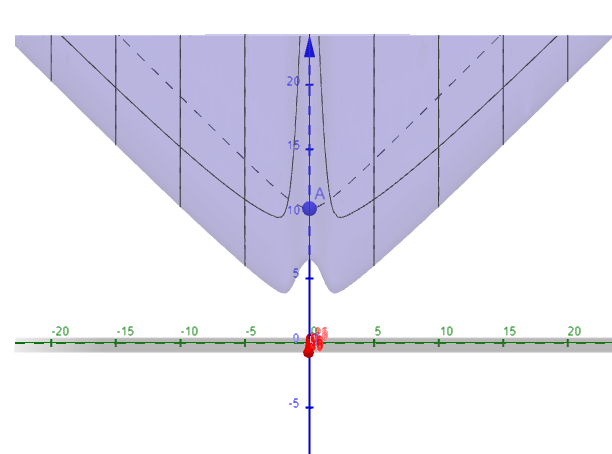

Nesse caso, para qualquer y = 0 o algoritmo falhará, pois se enxerga essa "equidistância".

Além disso, observamos que o tamanho do passo desempenha um papel importante. Usamos vários valores para o tamanho do passo, sendo eles 0,05; 0,1; 0,15; 0,2; 0,3 e 0,5. Quando o tamanho do passo é muito grande, o algoritmo pode falhar. Isso ocorre porque, com um passo grande, podemos acabar pulando o mínimo e oscilando ao redor dele. Por outro lado, quando o tamanho do passo era muito pequeno, embora se mantenha uma maior precisão, o algoritmo convergia mais lentamente. Portanto, escolher um bom tamanho de passo é essencial para o bom desempenho do código.

Assim, podemos considerar que é preciso ter cuidado ao escolher o ponto inicial e o tamanho do passo, já que ambos podem afetar significativamente a eficácia do algoritmo.

#### **3a etapa:** 

$$
4e^{-x^2-y^2} + 3e^{-x^2-y^2+4x+6y-13} - \frac{x^2}{5} - \frac{y^2}{4} + 2
$$

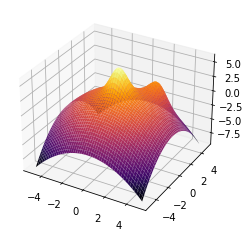

Para o ponto inicial [5 5] e alfa = 0.05, o máximo da função ocorre em: x = 1.86527, y = 2.75158, sendo o número de iterações 63.
Para o ponto inicial [5 5] e alfa = 0.1, o máximo da função ocorre em: x = 1.86527, y = 2.75158, sendo o número de iterações 28.
Para o ponto inicial [5 5] e alfa = 0.15, o máximo da função ocorre em: x = 1.86527, y = 2.75157, sendo o número de iterações 15.
Para o ponto inicial [5 5] e alfa = 0.2, o máximo da função ocorre em: x = 1.86527, y = 2.75157, sendo o número de iterações 13.
Para o ponto inicial [5 5] e alfa = 0.3, o máximo da função ocorre em: x = 1.86527, y = 2.75157, sendo o número de iterações 52.
Para o ponto inicial [5 5] e alfa = 0.5, o algoritmo não convergiu dentro de 10000 iterações.
Para o ponto inicial [ 0 -1] e alfa = 0.05, o máximo da função ocorre em: x = 0.00000, y = 0.00000, sendo o número de iterações 27.
Para o ponto inicial [ 0 -1] e alfa = 0.1, o máximo da função ocorre em: x = 0.00000, y = 0.00000, sendo o número de iterações 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def h(x, y):
    return 4*np.exp(-x**2 - y**2) + 3*np.exp(-x**2 - y**2 + 4*x + 6*y -13) - (x**2 / 5) - (y**2 / 4) + 2


def gradiente(x, y):
    dhdx = -8*x*np.exp(-x**2 - y**2) - (2*x / 5) - 6*(x - 2)*np.exp(-x**2 + 4*x - y**2 + 6*y - 13)
    dhdy = -8*y*np.exp(-x**2 - y**2) - (y / 2) - 6*(y - 3)*np.exp(-x**2 + 4*x - y**2 + 6*y - 13)
    return np.array([dhdx, dhdy])
    

# gráfico da função
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = h(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

plt.show()

# vamos encontrar os pontos máximos
def algoritmo(p_inicial, alfa, precisao, max_iter=10000):
    iter = 0
    p = p_inicial
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        p = p + alfa * gradiente(p[0], p[1])
        iter += 1
        if iter > max_iter:
            break
    return p, iter

# Pontos iniciais
p_iniciais = [np.array([5, 5]), np.array([0, -1])]

# Valores de alpha
alfas = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]

# Precisão
precisao = 1e-5

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_max, steps = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o algoritmo não convergiu dentro de 10000 iterações.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o máximo da função ocorre em: x = {x_max[0]:.5f}, y = {x_max[1]:.5f}, sendo o número de iterações {steps}.')

Os pontos encontrados foram $(1,86527 ; 2,75158)$ e $(0 ; 0)$

#### **4a etapa:** 

Utilizando passo variável para calcular o mínimo de $f(x, y)$

$$
f(x, y) = x^2 + xy + 4y^2 - x + 3y
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + x*y + 4*y**2 - x + 3*y

def gradiente(x, y):
    dfdx = 2*x + y - 1
    dfdy = x + 8*y + 3
    return np.array([dfdx, dfdy])

# A função de busca linear com retrocesso (backtracking line search) ajusta o tamanho do passo (alfa) durante o processo de otimização. 
# Ela começa com um tamanho de passo inicial e o reduz por um fator (beta) até que uma condição seja satisfeita. 
# Essa condição requer que o valor da função no novo ponto seja menor que o valor da função no ponto atual menos 
# uma fração da redução prevista no valor da função baseada no gradiente. 
# Esta condição garante uma redução suficiente no valor da função a cada passo, 
# o que leva a uma convergência mais rápida do algoritmo de otimização.
# fonte: https://math.stackexchange.com/questions/373868/optimal-step-size-in-gradient-descent

def backtracking_line_search(p, grad, alfa, beta=0.8):
    while f(p[0] - alfa * grad[0], p[1] - alfa * grad[1]) > f(p[0], p[1]) - alfa / 2 * np.linalg.norm(grad)**2:
        alfa *= beta
    return alfa
    
# vamos encontrar os pontos mínimos
def algoritmo(p_inicial, alfa, precisao, max_iter=10000):
    iter = 0
    p = p_inicial
    while np.linalg.norm(gradiente(p[0], p[1])) > precisao:
        alfa = backtracking_line_search(p, gradiente(p[0], p[1]), alfa)
        p = p - alfa * gradiente(p[0], p[1])
        iter += 1
        if iter > max_iter:
            break
    return p, iter, alfa

# pontos iniciais
p_iniciais = [np.array([0, 0])]

# valores de alpha
alfas = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]

# precisão
precisao = 1e-5

for i, p_inicial in enumerate(p_iniciais):
    for alfa in alfas:
        x_min, steps, alfa_novo = algoritmo(p_inicial, alfa, precisao)
        if steps > 10000:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o algoritmo não convergiu dentro de 10000 iterações. O valor de alfa otimizado foi {alfa_novo:.5f}.')
        else:
            print(f'Para o ponto inicial {p_inicial} e alfa = {alfa}, o mínimo da função ocorre em: x = {x_min[0]:.5f}, y = {x_min[1]:.5f}, sendo o número de iterações {steps}. O valor de alfa otimizado foi {alfa_novo:.5f}.')


Para o ponto inicial [0 0] e alfa = 0.05, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 124. O valor de alfa otimizado foi 0.05000.
Para o ponto inicial [0 0] e alfa = 0.1, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 59. O valor de alfa otimizado foi 0.10000.
Para o ponto inicial [0 0] e alfa = 0.15, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 48. O valor de alfa otimizado foi 0.12000.
Para o ponto inicial [0 0] e alfa = 0.2, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 45. O valor de alfa otimizado foi 0.12800.
Para o ponto inicial [0 0] e alfa = 0.3, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 47. O valor de alfa otimizado foi 0.12288.
Para o ponto inicial [0 0] e alfa = 0.5, o mínimo da função ocorre em: x = 0.73333, y = -0.46667, sendo o número de iterações 44. O valor de alfa otimiz

Com base nos resultados fornecidos, podemos fazer uma análise comparativa entre a performance do algoritmo de gradiente com passo fixo e a versão com passo variável por meio da busca linear de retrocesso.

Ao analisar o algoritmo com passo fixo, observamos que a escolha do valor de alfa tem um impacto significativo no desempenho do algoritmo. Valores de alfa relativamente pequenos, como 0,15 e 0,2, permitiram que o algoritmo convergisse com sucesso, necessitando de 37 e 28 iterações, respectivamente. No entanto, ao aumentarmos o valor de alfa para 0,3 e 0,5, o algoritmo tornou-se instável e divergiu.

Por outro lado, ao observarmos a performance do algoritmo com busca linear de retrocesso, vemos um quadro bastante diferente. Independentemente do valor inicial de alfa, o algoritmo foi capaz de encontrar o ponto de mínimo da função. Isso mostra a eficácia desse método, que é capaz de se adaptar às condições do problema e encontrar uma solução, mesmo quando o tamanho do passo inicial não é ideal.

No entanto, ao comparar o número de iterações necessárias para a convergência, notamos que o algoritmo com passo fixo foi mais rápido em alguns casos. Por exemplo, para alfa igual a 0,2, o algoritmo com passo fixo convergiu em 28 iterações, enquanto o algoritmo com busca linear de retrocesso necessitou de 45 iterações.

Esse resultado pode parecer contra-intuitivo à primeira vista, já que esperamos que a busca linear de retrocesso acelere a convergência. No entanto, é importante lembrar que a busca linear de retrocesso adiciona um passo adicional a cada iteração, que é o processo de encontrar o tamanho de passo ideal. Isso pode levar a um maior número total de iterações, mesmo que cada iteração esteja se movendo na direção mais eficiente.

Em resumo, a busca linear de retrocesso adiciona robustez ao algoritmo de gradiente, permitindo que ele encontre uma solução, mesmo quando o tamanho do passo inicial não é ideal. No entanto, em termos de velocidade de convergência, a escolha do tamanho do passo inicial ainda tem um impacto significativo e, em alguns casos, um algoritmo de gradiente com um passo fixo bem escolhido pode ser mais rápido.